### SVM

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rcParams['figure.figsize']=(15,10)
plt.style.use('ggplot')

In [13]:
data = pd.read_csv('../data/Iris.csv')
data = data.rename(index=str, columns={"Species": "Class"})

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
X = data.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
y = data['Class'].values

from sklearn.preprocessing import LabelEncoder
labelencoder_forecast = LabelEncoder()
y = labelencoder_forecast.fit_transform(y)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=data.columns[1:3]).values


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [34]:
from sklearn.svm import SVC
classifiersvm = SVC(kernel='linear').fit(X_train, y_train)

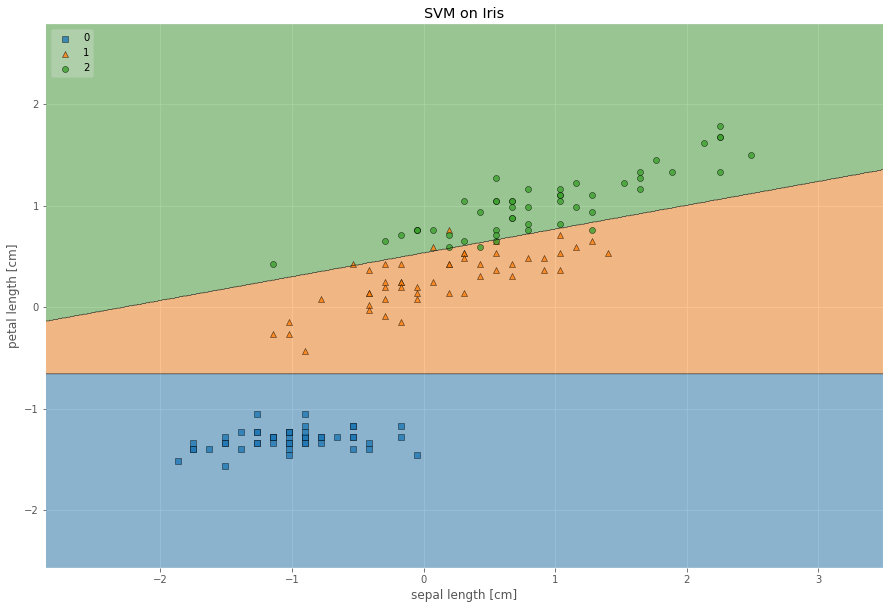

In [35]:
#Decision regions in 2D
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X, y, clf=classifiersvm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

#### avaliando o algoritmo com validação cruzada

In [37]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(classifiersvm, X, y, scoring='accuracy', cv=10)
print(scores_dt.mean())

0.9533333333333334


In [38]:
y_pred = classifiersvm .predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 

In [40]:
print(classification_report(y_test,y_pred))
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Decision Tree model accuracy(in %): 97.77777777777777
[[13  0  0]
 [ 0 20  0]
 [ 0  1 11]]


In [41]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [44]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8055555555555556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.8, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7647058823529411, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7222222222222222, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6857142857142857, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7058823529411765, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.8823529411764706, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.0001,

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [46]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
grid_predictions = grid.predict(X_test)

In [48]:
print(confusion_matrix(y_test,grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [49]:
print(classification_report(y_test,grid_predictions))
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, grid_predictions)*100)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Decision Tree model accuracy(in %): 95.55555555555556
